# Convolutional Neural Network with Keras

**What is Keras?** Keras is a wrapper that allows you to implement Deep Neural Networks without getting into intrinsic details of the Network. It can use *Tensorflow* or *Theano* as backend. 


In this lab you will build the *various state-of-the-art DNN networks* and explore *tranfer learning* for image classification (classify whether an image contains an airplane or automobile or bird or cat or deer or dog or frog or horse or ship or truck).

# Importing libraries

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

# Importing Dataset

Here we are loading the cifar10 Dataset which is preloaded in tensorflow. <br>

Calling the `load_data` function on this object returns splitted train and test data in form of (features, target).

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Overview of Dataset

The CIFAR10 dataset contains 60,000 (32 x 32 pixel) color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.<br>
>The shape (50000, 32, 32, 3) represents **50000** images each of dimension **32 x 32 x 3**.<br>
The shape **(50000, )** represents (50000, 1) shape i.e. 50000 labels, each for one image.

In [3]:
print(f'Shape of the training data: {train_images.shape}')
print(f'Shape of the training target: {train_labels.shape}')
print(f'Shape of the test data: {test_images.shape}')
print(f'Shape of the test target: {test_labels.shape}')

Shape of the training data: (50000, 32, 32, 3)
Shape of the training target: (50000, 1)
Shape of the test data: (10000, 32, 32, 3)
Shape of the test target: (10000, 1)


In [4]:
print(train_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


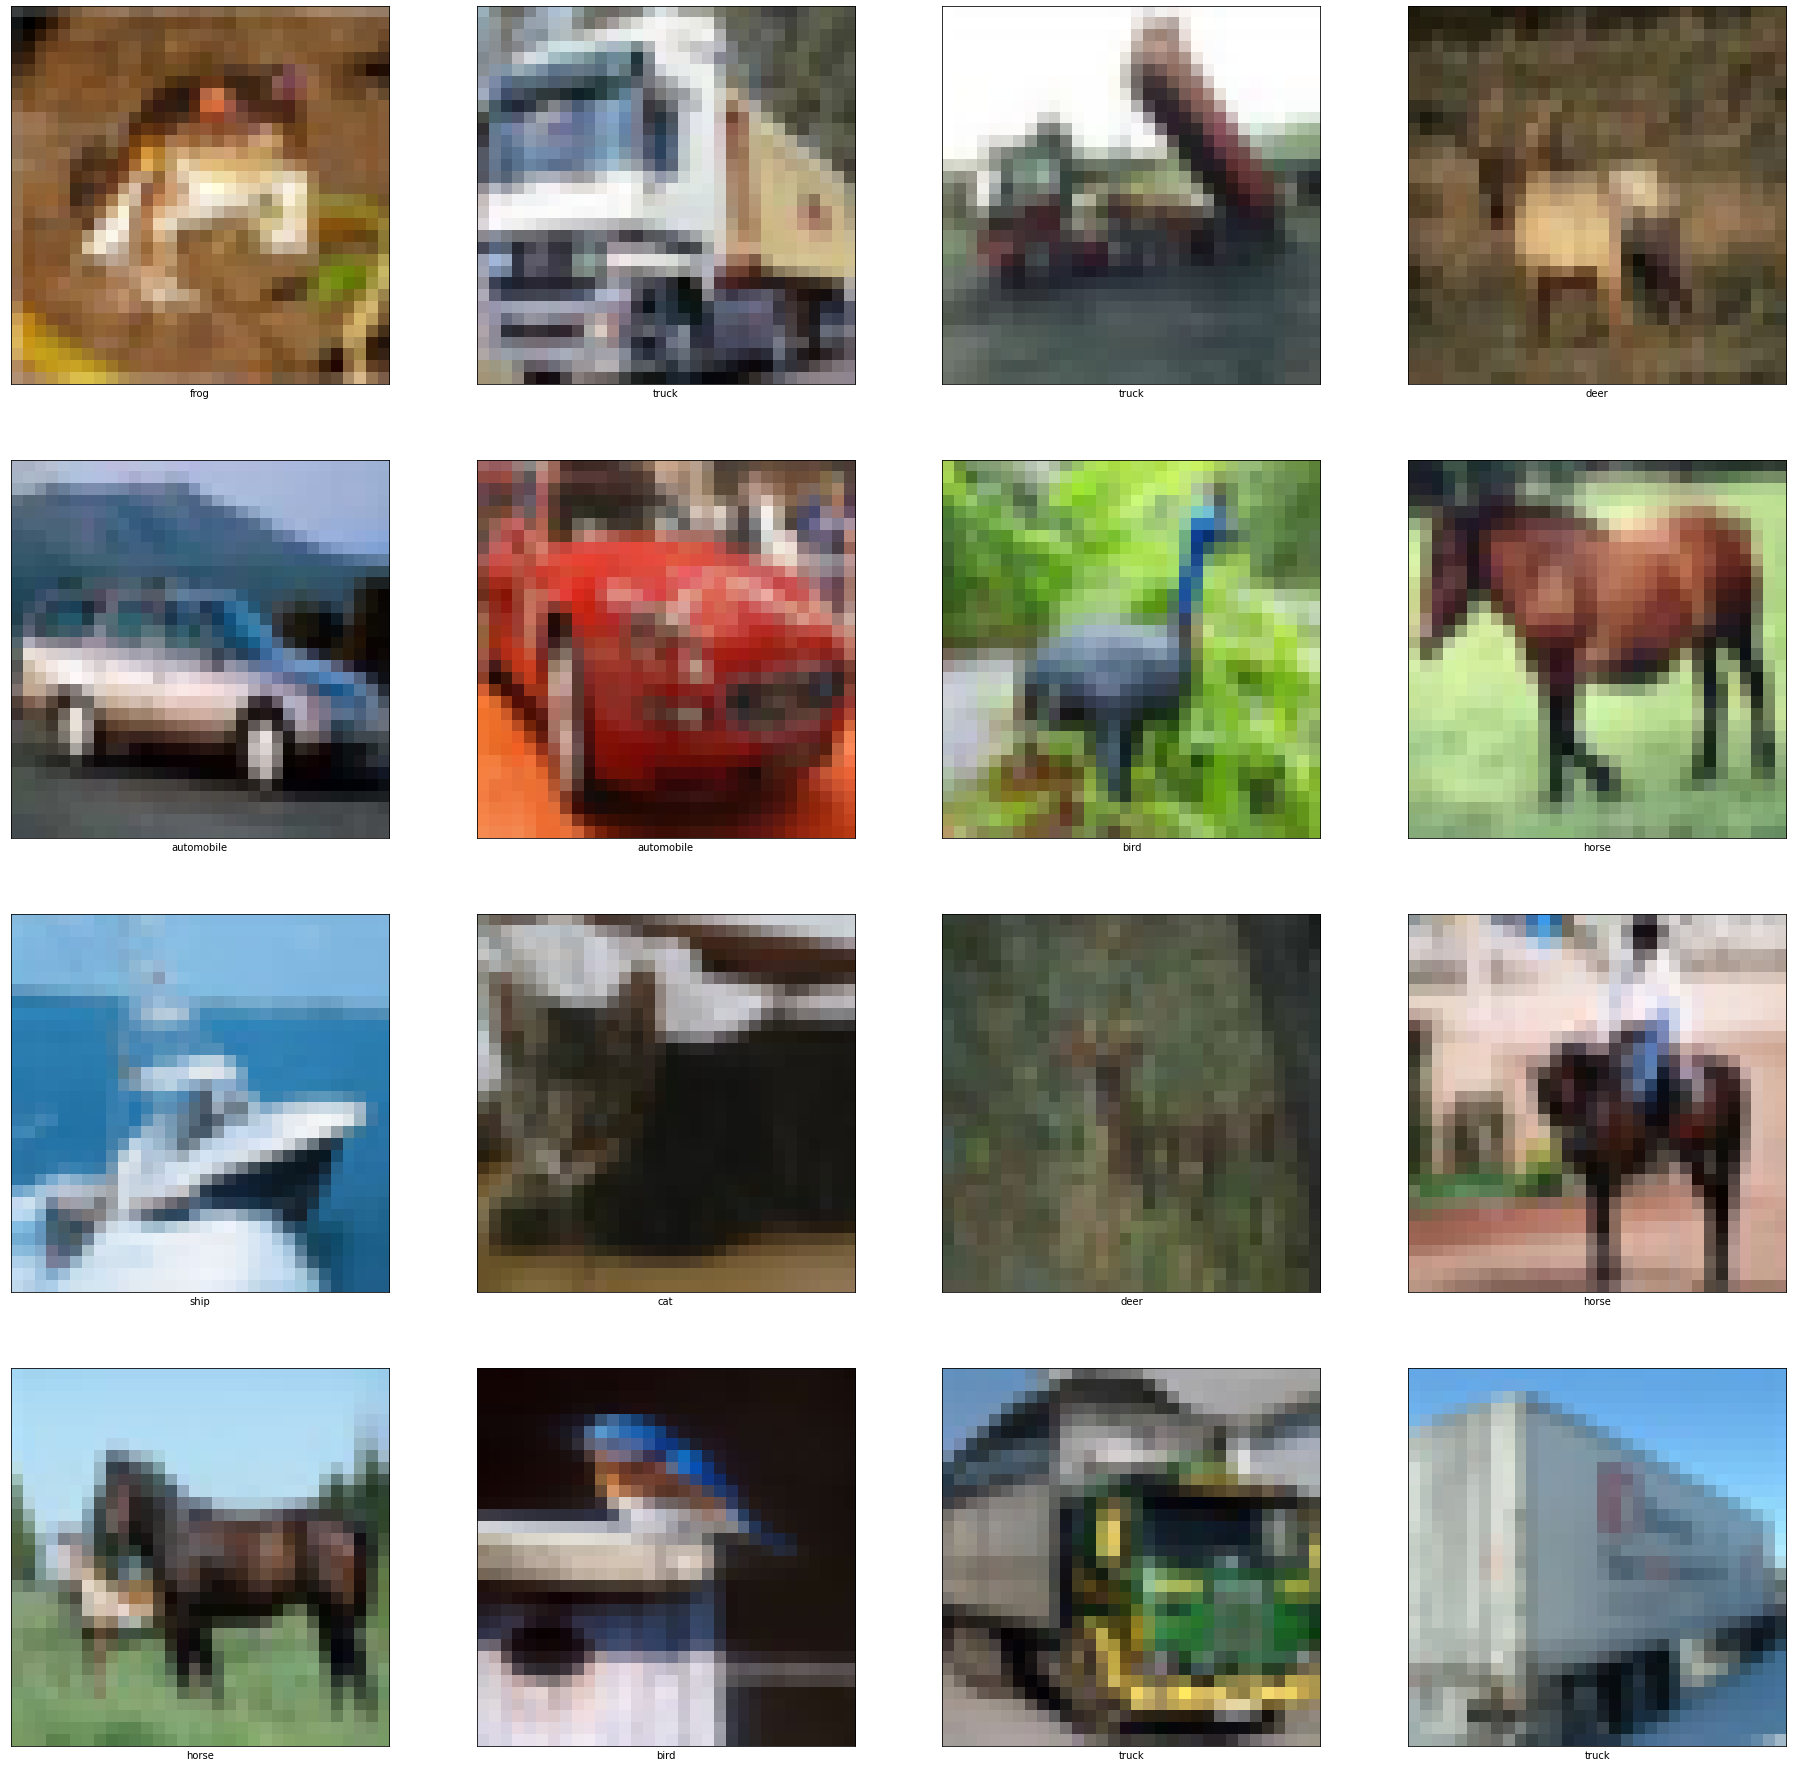

In [5]:
# To verify that the dataset looks correct, let's plot the first 16 images from the training set and display the class name below each image.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(32,32))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Preprocessing

Normalizing i.e. scaling the pixels to 0-1 from 0-255.

In [6]:
# Normalizing
train_images, test_images = train_images / 255.0, test_images / 255.0

Or alternatively standardizing

In [7]:
#Standardizing 
import pdb
def standardize(image_data):
        image_data = image_data.astype(float)
        mean = np.mean(image_data, axis=0)
        image_data -= mean
        std = np.std(image_data, axis=0)
        image_data /= std
        return image_data, mean, std

train_images, mean, std =   standardize(train_images)

def standardize_test(image_data, mean, std):
        image_data = image_data.astype(float)
        image_data -= mean
        image_data /= std
        return image_data

test_images =   standardize_test(test_images, mean, std)



# Creating by yourselves the VGG16

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size; color_channels refer to (R,G,B). 
In this example, we will build the VGG16 network and configure it to process inputs of shape (32, 32, 3). We can do this by passing the argument input_shape to our first layer.


In [8]:
model = models.Sequential()

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", input_shape=(32,32,3)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))  ## END BLOCK 1
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))   ## END BLOCK 2
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 3 
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 4 
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 5 
model.add(layers.Flatten())    ## converting to vector 
model.add(layers.Dense(4096, activation="relu"))    ## 1st FC layer 
model.add(layers.Dense(4096, activation="relu"))    ## 2st FC layer 
model.add(layers.Dense(10, activation="softmax"))    ## output layer 




model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

# Using the built-in Keras code and weights of VGG16


Keras provides access to a number of top-performing pre-trained models that were developed for image recognition tasks.

They are available via the Applications API, and include functions to load a model with or without the pre-trained weights, and prepare data in a way that a given model may expect (e.g. scaling of size and pixel values).

The first time a pre-trained model is loaded, Keras will download the required model weights, which may take some time given the speed of your internet connection. 

When loading a given model, the “include_top” argument can be set to False, in which case the model's fully-connected layers and the output layer, will not be loaded, allowing new layers to be added and trained. A model without a top will output activations from the last convolutional or pooling layer directly.
Additionally, when the “include_top” argument is False, the “input_tensor” argument must be specified, allowing the expected fixed-sized input of the model to be changed. 

Alternately, we may wish to use the VGG16 model layers, but train the new layers of the model without updating the weights of the VGG16 layers (aka freeze these weights). This will allow the new added layers to learn to interpret the learned features of the VGG16.
This can be achieved by setting the “trainable” property on each of the layers in the loaded VGG model to False prior to training. 
You can pick and choose which layers are trainable.


In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=(32, 32, 3)) 
    
### If we want to freeze these pretrained weights:

#for layer in model.layers:
#	layer.trainable = False     # mark loaded layers as not trainable

# add new classifier layers
flat1 = layers.Flatten()(model.layers[-1].output)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(10, activation='softmax')(fc2)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

## Training

```model.fit``` trains the model.
> * **train_images**: Training data/features
* **train_labels**: Target
* **epochs**: Number of times the entire dataset is fed in the model



Epoch 1/10
98/98 [==============================] - 11s 108ms/step - loss: 0.8810 - accuracy: 0.6900 - val_loss: 0.6264 - val_accuracy: 0.7826
Epoch 2/10
98/98 [==============================] - 8s 85ms/step - loss: 0.4989 - accuracy: 0.8274 - val_loss: 0.5363 - val_accuracy: 0.8176
Epoch 3/10
98/98 [==============================] - 9s 88ms/step - loss: 0.3593 - accuracy: 0.8731 - val_loss: 0.4863 - val_accuracy: 0.8320
Epoch 4/10
98/98 [==============================] - 9s 87ms/step - loss: 0.2544 - accuracy: 0.9107 - val_loss: 0.5192 - val_accuracy: 0.8296
Epoch 5/10
98/98 [==============================] - 8s 86ms/step - loss: 0.1808 - accuracy: 0.9362 - val_loss: 0.5044 - val_accuracy: 0.8482
Epoch 6/10
98/98 [==============================] - 8s 86ms/step - loss: 0.1225 - accuracy: 0.9574 - val_loss: 0.5745 - val_accuracy: 0.8388
Epoch 7/10
98/98 [==============================] - 8s 87ms/step - loss: 0.0824 - accuracy: 0.9717 - val_loss: 0.7332 - val_accuracy: 0.8293
Epoch 8/10


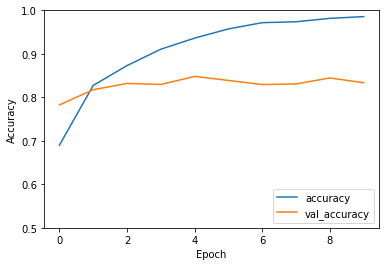

In [10]:
# Training
history = model.fit(train_images, train_labels, epochs=10, batch_size=512,
                    validation_data=(test_images, test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

## Visualize prediction

Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the ground truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

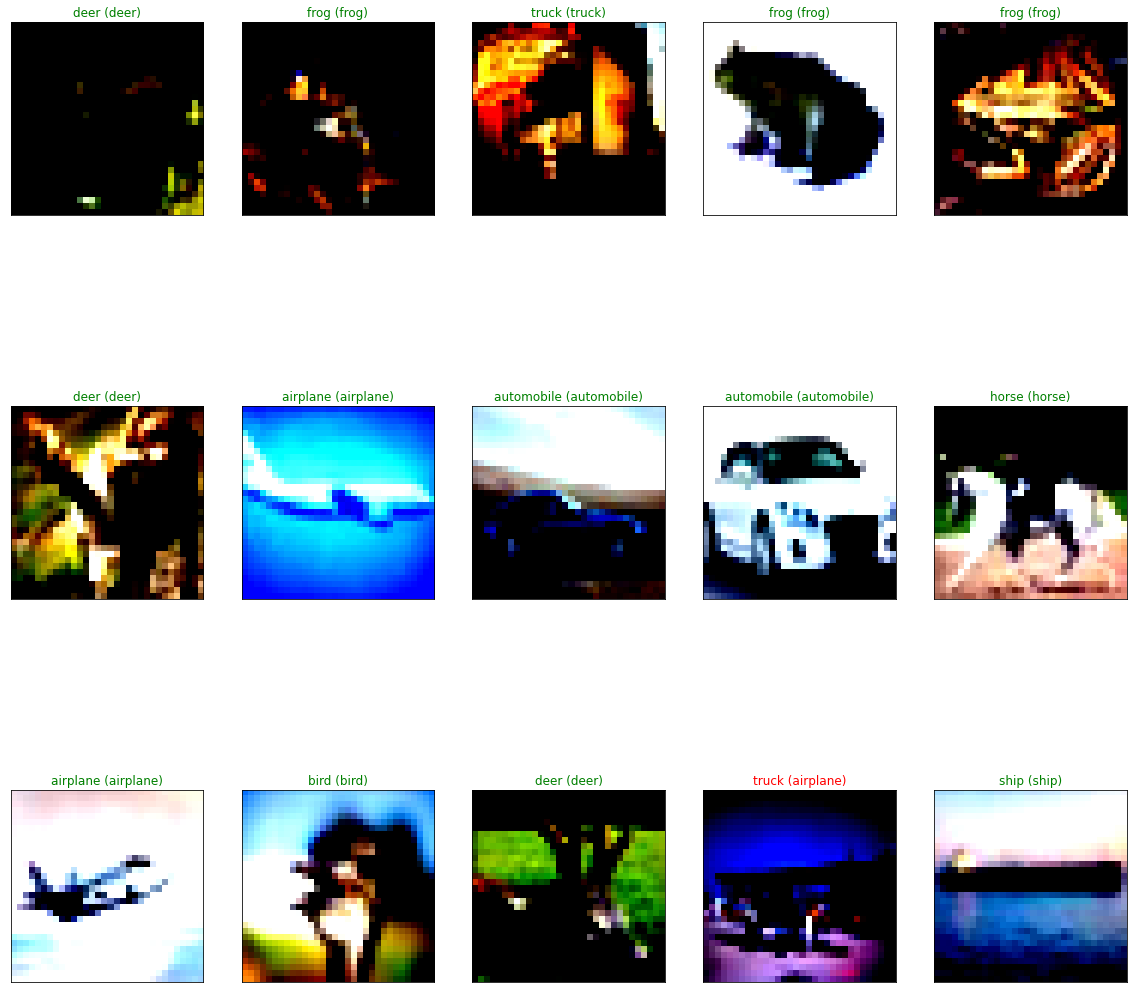

In [11]:
import pdb
y_hat = model.predict(test_images)

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index][0]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Using the built-in Keras code and weights of ResNet




In [12]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model

# load model without classifier layers
model = ResNet50(include_top=False, weights="imagenet", input_shape=(32, 32, 3)) 
    

# add new classifier layers
flat1 = layers.Flatten()(model.layers[-1].output)
output = layers.Dense(10, activation='softmax')(flat1)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])




## Model details

Let's look at details of the model.


In [13]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

## Training

```model.fit``` trains the model.
> * **train_images**: Training data/features
* **train_labels**: Target
* **epochs**: Number of times the entire dataset is fed in the model



Epoch 1/10
196/196 [==============================] - 18s 92ms/step - loss: 0.0442 - accuracy: 0.9860 - val_loss: 1.0553 - val_accuracy: 0.7702
Epoch 2/10
196/196 [==============================] - 18s 89ms/step - loss: 0.0272 - accuracy: 0.9919 - val_loss: 1.1250 - val_accuracy: 0.7677
Epoch 3/10
196/196 [==============================] - 17s 88ms/step - loss: 0.0305 - accuracy: 0.9910 - val_loss: 1.1576 - val_accuracy: 0.7593
Epoch 4/10
196/196 [==============================] - 17s 88ms/step - loss: 0.0349 - accuracy: 0.9886 - val_loss: 1.1103 - val_accuracy: 0.7680
Epoch 5/10
196/196 [==============================] - 17s 89ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 1.1366 - val_accuracy: 0.7723
Epoch 6/10
196/196 [==============================] - 17s 89ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 1.1556 - val_accuracy: 0.7746
Epoch 7/10
196/196 [==============================] - 17s 88ms/step - loss: 0.0276 - accuracy: 0.9915 - val_loss: 1.1456 - val_accuracy:

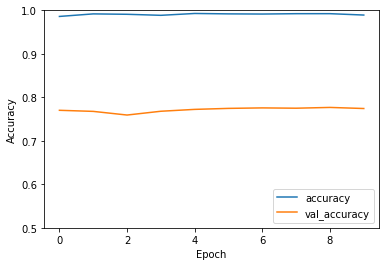

In [101]:
# Training
history = model.fit(train_images, train_labels, epochs=10, batch_size=256,
                    validation_data=(test_images, test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

## Visualize prediction

Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the ground truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

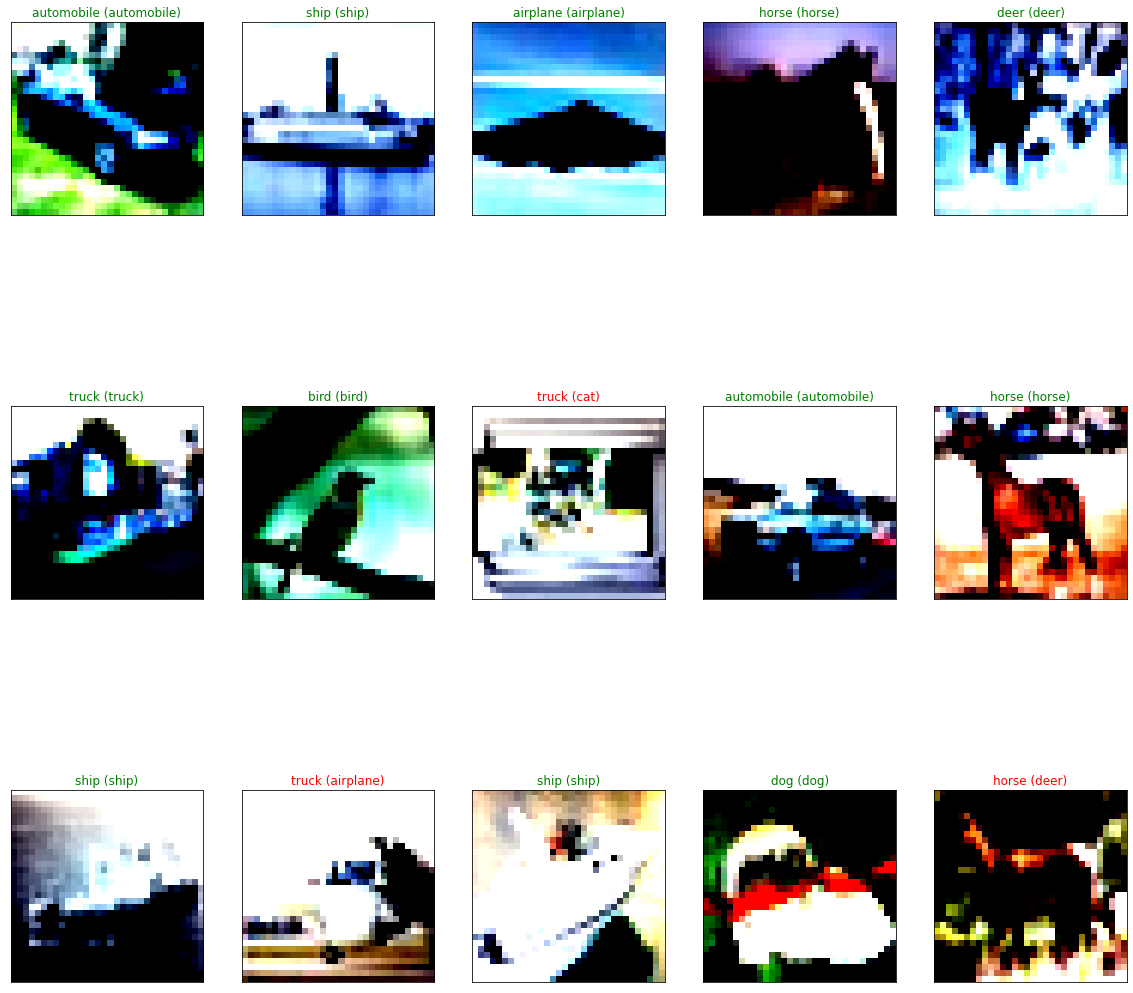

In [15]:
import pdb
y_hat = model.predict(test_images)

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index][0]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Using the built-in Keras code and weights of other state-of-the-art DNNs




For potential models to use have a  look at (you can also find their performance on ImageNet):
https://keras.io/api/applications/

Generally read the documentation when you are using a model as this explains the arguments needed and also the input format needed.

In [102]:
from tensorflow.keras.applications import ResNet101, ResNet152,  ResNet50V2, ResNet101V2, ResNet152V2, DenseNet121, DenseNet169, DenseNet201, NASNetLarge
from tensorflow.keras.models import Model

# for EfficientNet have a look here: https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/image_classification_efficientnet_fine_tuning.ipynb
# have a careful look at the documentation as well, for instance Keras built-in EfficientNet doesn't want normalised input as it is normalising it by itself (the code)

In [103]:
# load model without classifier layers
model = ResNet101(include_top=False, weights="imagenet", input_shape=(32, 32, 3)) # or you can load here any other network
    

# add new classifier layers
flat1 = layers.Flatten()(model.layers[-1].output)
output = layers.Dense(10, activation='softmax')(flat1)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])




## Model details

Let's look at details of the model.


In [104]:
model.summary()


Model: "model_78"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

## Training

```model.fit``` trains the model.
> * **train_images**: Training data/features
* **train_labels**: Target
* **epochs**: Number of times the entire dataset is fed in the model



Epoch 1/10
196/196 [==============================] - 18s 94ms/step - loss: 1.4115 - accuracy: 0.5380 - val_loss: 3.9226 - val_accuracy: 0.1066
Epoch 2/10
196/196 [==============================] - 17s 85ms/step - loss: 0.5805 - accuracy: 0.8033 - val_loss: 2.6855 - val_accuracy: 0.2110
Epoch 3/10
196/196 [==============================] - 16s 82ms/step - loss: 0.2558 - accuracy: 0.9184 - val_loss: 2.2872 - val_accuracy: 0.4035
Epoch 4/10
196/196 [==============================] - 16s 81ms/step - loss: 0.1054 - accuracy: 0.9706 - val_loss: 1.1428 - val_accuracy: 0.6948
Epoch 5/10
196/196 [==============================] - 15s 78ms/step - loss: 0.0649 - accuracy: 0.9819 - val_loss: 1.0302 - val_accuracy: 0.7499
Epoch 6/10
196/196 [==============================] - 16s 81ms/step - loss: 0.0789 - accuracy: 0.9763 - val_loss: 0.9950 - val_accuracy: 0.7484
Epoch 7/10
196/196 [==============================] - 16s 83ms/step - loss: 0.0564 - accuracy: 0.9828 - val_loss: 1.0107 - val_accuracy:

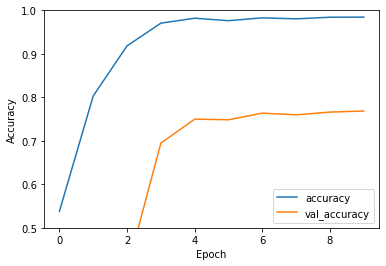

In [105]:
# Trainingtensorflow.
history = model.fit(train_images, train_labels, epochs=10, batch_size=256,
                    validation_data=(test_images, test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

## Visualize prediction

Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the ground truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

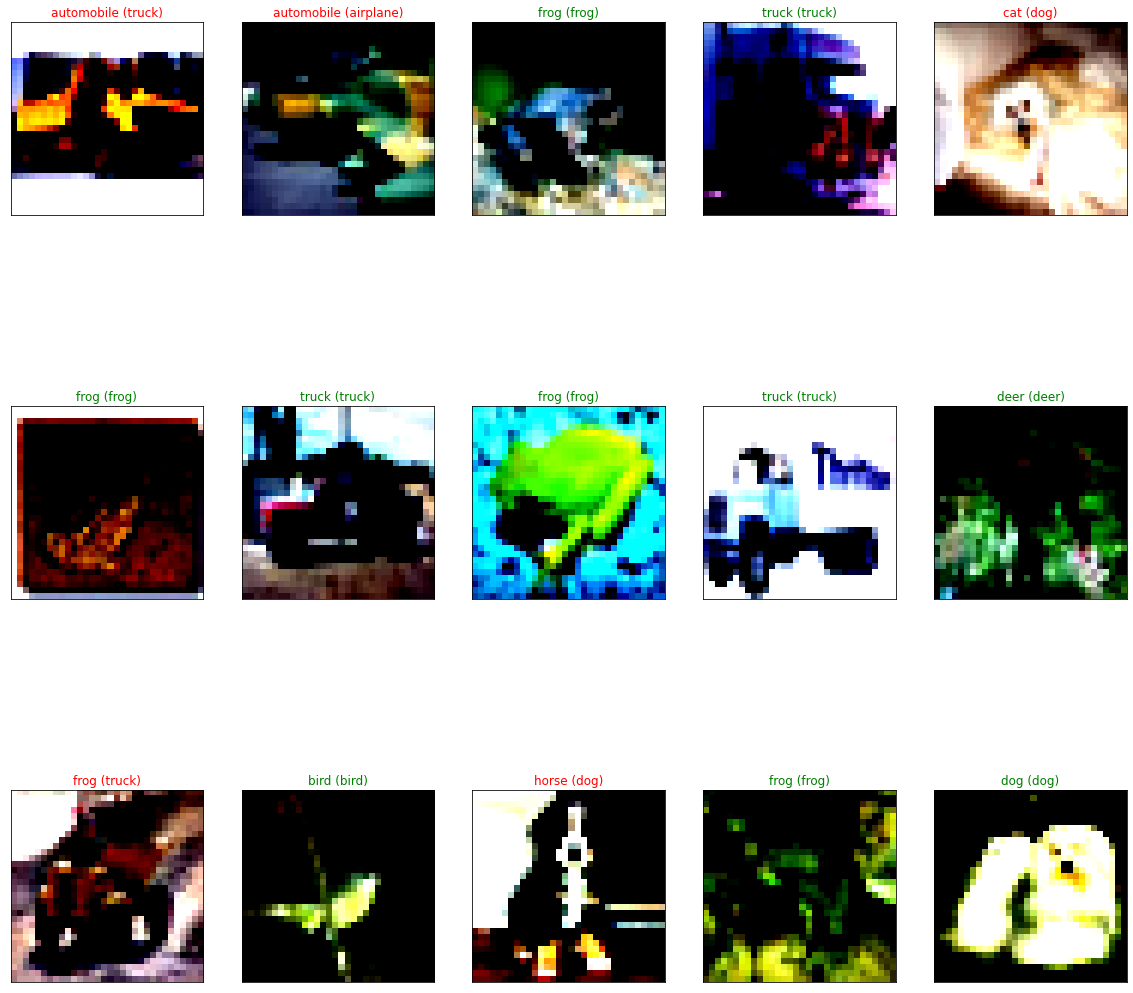

In [108]:
import pdb
y_hat = model.predict(test_images)

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index][0]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Visualising feature maps

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Model: "model_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 38, 38, 3)         0         
_________________________________________________________________
conv1_conv (Conv2D)          (None, 16, 16, 64)        9472      
Total params: 9,472
Trainable params: 9,472
Non-trainable params: 0
_________________________________________________________________


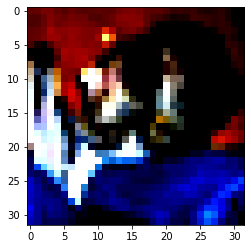

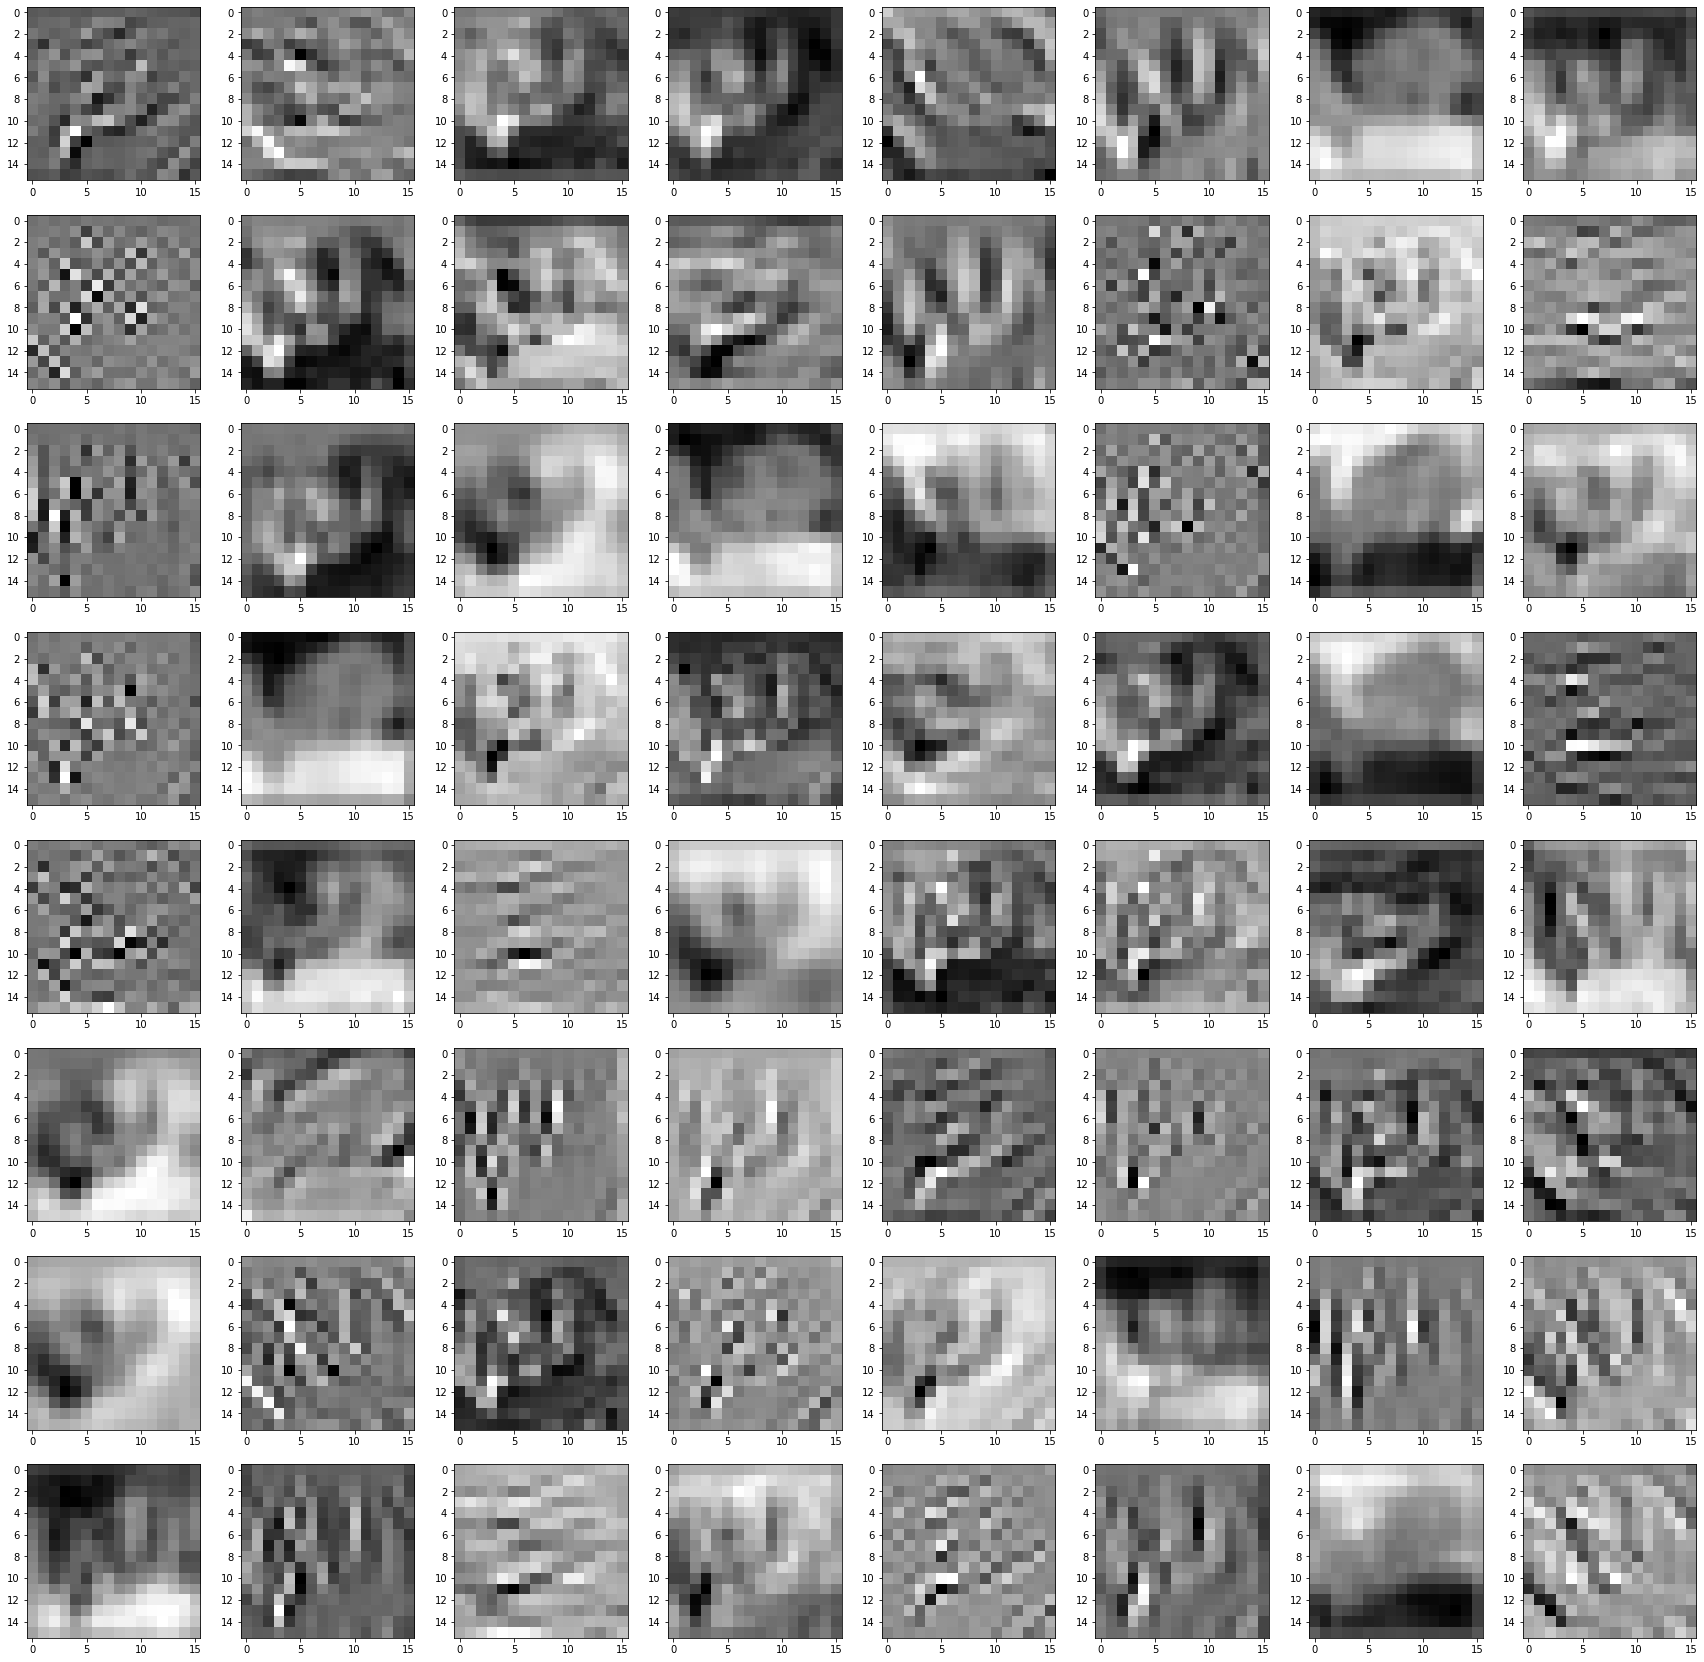

In [110]:
from numpy import expand_dims
from tensorflow.keras.models import Model

# redefine model to output right after the first conv layer
model1 = Model(inputs=model.inputs, outputs=model.layers[2].output)   ### here you need to select only conv or pooling layers; the index should always start from 1; index 0 corresponds to the input layer
model1.summary()
# load the image with the required shape
img = test_images[0]   ### if you want change the index here to load another image from the test/training set
# convert the image to an array
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# get feature map for first conv layer
feature_maps = model1.predict(img)
# plot all 64 maps in 8x8 squares   
### square1 times square2 should always be the number of output feature maps of the layer 
### (in other words should be the last number of the 'output shape' column of the model summary)
square1 = 8
square2 = 8
ix = 1

# Display the input image
plt.imshow(img[0])


figure = plt.figure(figsize=(30, 30))
for _ in range(square1):
	for _ in range(square2):
		ax = figure.add_subplot(square1, square2, ix) #, xticks=[], yticks=[])
    # Display each image
		# plot filter channel in grayscale
		ax.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

## Try/Check the following (in random order)


1) Run the VGG16 from scratch, i.e., from the 'Creating by yourselves the VGG16' Section. Try using different learning rates (e.g: 0.001 and 0.0001) </br>
2) Use transfer learning on the pre-trained VGG16, i.e., run the code on  'Using the built-in Keras code and weights of VGG16' Section. Try using different learning rates (e.g: 0.001 and 0.0001)  </br>
3) Use transfer learning on the pre-trained VGG16 and keep its conv layers freeze (meaning not train these layers and train only the fully connected ones), i.e., run the code on 'Using the built-in Keras code and weights of VGG16' Section and uncomment the commented code that freezes the weights. Try using different learning rates (e.g: 0.001 and 0.0001) </br>

Also try changing the number of units in the fully connected layers. </br>
Also try using different batch sizes. </br>
Allso try training for more epochs.</br>

Compare performance in all cases. </br>

Finally check feature maps in these cases (try to check feature maps of different layers and of different test images) </br>


Try similar things as above with the other state-of-the-art networks. Try to add more fully connected layers on top of them (and before the output layer). </br>
Try to not load their pretrained weights but train them from scratch:
in the code replace:   weights="imagenet"   ->     weights=None   </br>

Compare performance between VGG16 and the other networks.



# Data Augmentation 


In [100]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing 
from tensorflow import keras

##  RandomContrast: Adjust the contrast of an image or images by a random factor.
##  RandomCrop: Randomly crop the images to target height and width.
##  RandomFlip: Randomly flip each image horizontally and vertically.
##  RandomHeight: Randomly vary the height of a batch of images during training.
##  RandomRotation: Randomly rotate each image.
##  RandomTranslation: Randomly translate each image during training.
##  RandomWidth: Randomly vary the width of a batch of images during training.
##  RandomZoom: Randomly zoom each image during training.
##  Rescaling: Multiply inputs by scale and adds offset.
##  Resizing: Image resizing layer.

# for specific details on the preprocessing layers have a look here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing
data_augmentation = keras.Sequential(
    [   #preprocessing.Resizing(height=32, width=32, interpolation="bilinear"),
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        preprocessing.random_zoom(zoom_range=[0.5,1.0], 
                                  row_axis=0, 
                                  col_axis=1, 
                                  channel_axis=2, 
                                  fill_mode='nearest'),
    ]
)
# the augmentation is being made part of the model. Note that data augmentation is inactive at test time.

# Create a model that includes the augmentation stage
input_shape = (32, 32, 3)
classes = 10


inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)

# Add the rest of the model
model = keras.applications.ResNet50(include_top=False,
    weights='imagenet', input_shape=input_shape)(x)

# add new classifier layers
flat1 = layers.Flatten()(model)
outputs = layers.Dense(10, activation='softmax')(flat1)



# define new model
model = Model(inputs=inputs, outputs= outputs)


model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])




# initialize the number of epochs and batch size
EPOCHS = 10
BS = 256


# train the network
history = model.fit(train_images, train_labels, shuffle= True,
	validation_data=(test_images, test_labels), steps_per_epoch=len(train_images) // BS,
	epochs=EPOCHS)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

AttributeError: module 'tensorflow.keras.layers.experimental.preprocessing' has no attribute 'random_zoom'

</br></br>

</br></br>
</br></br>
# Helpful for CW 

</br></br></br></br></br>


# Upload image in Colab, Load image, Resize image


In [ ]:
from google.colab import files
files.upload()

In [ ]:
import cv2,glob

items = glob.glob('/content/images/*')
aaa = []
for each_image in items:
  #if each_image.endswith(".jpg") or each_image.endswith(".jpeg"):

   image = cv2.imread(each_image)
   image = cv2.resize(image, (96,96))
   aaa.append(image)


# Save model during training, compute evaluation metrics





In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Sequential



# for specific details on the preprocessing layers have a look here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing
data_augmentation = Sequential(
    [   #preprocessing.Resizing(height=32, width=32, interpolation="bilinear"),
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        preprocessing.RandomZoom(0.1),
    ]
)
# the augmentation is being made part of the model. Note that data augmentation is inactive at test time.

# Create a model that includes the augmentation stage
input_shape = (32, 32, 3)
classes = 10


inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)

# Add the rest of the model
model = keras.applications.ResNet50(include_top=False,
    weights='imagenet', input_shape=input_shape)(x)

# add new classifier layers
flat1 = layers.Flatten()(model)
outputs = layers.Dense(10, activation='softmax')(flat1)



# define new model
model = Model(inputs=inputs, outputs= outputs)


model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])








# define the checkpoint, have a look here for the arguments: https://keras.io/api/callbacks/model_checkpoint/
filepath = "ResNet-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]


# initialize the number of epochs and batch size
EPOCHS = 2
BS = 256


# train the network
history = model.fit(train_images, train_labels, shuffle= True,
	validation_data=(test_images, test_labels), steps_per_epoch=len(train_images) // BS,
	epochs=EPOCHS, callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
from keras.models import load_model

# here you need to specify the saved model from before
filepath = "/content/ResNet-02-0.1784.h5"

# load the model
new_model = load_model(filepath)

# for the metrics and details have a look here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
y_pred1 = new_model.predict(test_images)
y_pred = np.argmax(y_pred1, axis=1)


print(classification_report(test_labels, y_pred))


# Print f1, precision, and recall scores
print(precision_score(test_labels, y_pred , average="macro"))
print(recall_score(test_labels, y_pred , average="macro"))

print(f1_score(test_labels, y_pred , average="macro"))
print(f1_score(test_labels, y_pred , average="micro"))
print(f1_score(test_labels, y_pred , average="weighted"))